# Introduction

This notebook is written to demonstrate the use of M3GNet as a structure relaxer as well as to provide more comprehensive benchmarks for cubic crystals based on exp data on Wikipedia and MP DFT data. This benchmark is limited to cubic crystals for ease of comparison since there is only one lattice parameter. 

If you are running this notebook from Google Colab, uncomment the next code box to install m3gnet first.

In [3]:
! pip install lxml

   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
    --------------------------------------- 0.1/3.9 MB 880.9 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/3.9 MB 1.6 MB/s eta 0:00:03
   ---- ----------------------------------- 0.5/3.9 MB 2.4 MB/s eta 0:00:02
   -------- ------------------------------- 0.8/3.9 MB 3.4 MB/s eta 0:00:01
   ------------ --------------------------- 1.2/3.9 MB 4.3 MB/s eta 0:00:01
   ----------------- ---------------------- 1.7/3.9 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 2.5/3.9 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 3.3/3.9 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------  3.9/3.9 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 8.3 MB/s eta 0:00:00


In [1]:
import warnings

from m3gnet.models import Relaxer
from pymatgen.core import Lattice, Structure

for category in (UserWarning, DeprecationWarning):
    warnings.filterwarnings("ignore", category=category, module="tensorflow")

# Init a Mo structure with stretched lattice (DFT lattice constant ~ 3.168)
mo = Structure(Lattice.cubic(3.3), ["Mo", "Mo"], [[0., 0., 0.], [0.5, 0.5, 0.5]])

relaxer = Relaxer()  # This loads the default pre-trained model

relax_results = relaxer.relax(mo, verbose=True)

final_structure = relax_results['final_structure']
final_energy_per_atom = float(relax_results['trajectory'].energies[-1] / len(mo))

print(f"Relaxed lattice parameter is {final_structure.lattice.abc[0]:.3f} Å")
print(f"Final energy is {final_energy_per_atom:.3f} eV/atom")

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 19:57:54      -21.330704*      10.2491
FIRE:    1 19:57:57      -20.743158*      20.4843
FIRE:    2 19:57:57      -21.694870*       2.4213
FIRE:    3 19:57:57      -21.208538*      11.5265
FIRE:    4 19:57:57      -21.353798*       9.9677
FIRE:    5 19:57:57      -21.562597*       6.5603
FIRE:    6 19:57:57      -21.702246*       2.0209
FIRE:    7 19:57:57      -21.696190*       2.3511
FIRE:    8 19:57:57      -21.697779*       2.2639
FIRE:    9 19:57:57      -21.700720*       2.0934
FIRE:   10 19:57:57      -21.704586*       1.8471
FIRE:   11 19:57:57      -21.708820*       1.5354
FIRE:   12 19:57:57      -21.712812*       1.1708
FIRE:   13 19:57:57      -21.716003*       0.7668
FIRE:   14 19:57:57      -21.717947*       0.3373
FIRE:   15 19:57:57      -21.718319*       0.1499
FIRE:   16 19:57:58      -21.718323*       0.1483
FIRE:   17 19:57:58      -21.718328*       0.1450
FI

In [2]:
id_train, id_val, id_test = get_id_train_val_test(
    total_size=len(data),
    split_seed=42,
    train_ratio=0.90,
    val_ratio=0.05,
    test_ratio=0.05,
    keep_data_order=False,
)

cnt = 0
for idx, item in df.items():
    # import pdb; pdb.set_trace()
    if cnt in id_train:
        for iid in range(len(item['energy'])):
            dataset_train.append({"atoms":item['structure'][iid], "energy":item['energy'][iid] / len(item['force'][iid]), "force": np.array(item['force'][iid])})
    elif cnt in id_val:
        for iid in range(len(item['energy'])):
            dataset_val.append({"atoms":item['structure'][iid], "energy":item['energy'][iid] / len(item['force'][iid]), "force": np.array(item['force'][iid])})
    elif cnt in id_test:
        for iid in range(len(item['energy'])):
            dataset_test.append({"atoms":item['structure'][iid], "energy":item['energy'][iid] / len(item['force'][iid]), "force": np.array(item['force'][iid])})
    cnt += 1

print('using %d samples to train, %d samples to evaluate, and %d samples to test'%(len(dataset_train), len(dataset_val), len(dataset_test)))

NameError: name 'get_id_train_val_test' is not defined

In [21]:
! pip install mp-api

     ---------------------------------------- 65.6/65.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 40.6/40.6 MB 7.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached ratelimit-2.2.1-py3-none-any.whl
  Using cached ruamel.yaml-0.17.40-py3-none-any.whl.metadata (19 kB)
     -------------------------------------- 151.6/151.6 kB 8.8 MB/s eta 0:00:00
  Using cached mongomock-4.1.2-py2.py3-none-any.whl.metadata (1.1 kB)
     ---------------------------------------- 45.5/45.5 kB ? eta 0:00:00
  Using cached mongogrant-0.3.3-py3-none-any.whl.metadata (6.0 k

  error: subprocess-exited-with-error
  
  × Building wheel for pymatgen (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1298 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-37
      creating build\lib.win-amd64-cpython-37\pymatgen
      creating build\lib.win-amd64-cpython-37\pymatgen\alchemy
      copying pymatgen\alchemy\filters.py -> build\lib.win-amd64-cpython-37\pymatgen\alchemy
      copying pymatgen\alchemy\materials.py -> build\lib.win-amd64-cpython-37\pymatgen\alchemy
      copying pymatgen\alchemy\transmuters.py -> build\lib.win-amd64-cpython-37\pymatgen\alchemy
      copying pymatgen\alchemy\__init__.py -> build\lib.win-amd64-cpython-37\pymatgen\alchemy
      creating build\lib.win-amd64-cpython-37\pymatgen\analysis
      copying pymatgen\analysis\adsorption.py -> build\lib.win-amd64-cpython-37\pymatgen\analysis
      copying pymatgen\analysis\bond_dissoc

In [20]:
import traceback
import warnings

import numpy as np
import pandas as pd
from pymatgen.core import Composition, Lattice, Structure
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from tqdm import tqdm

from m3gnet.models import Relaxer

for category in (UserWarning, DeprecationWarning):
    warnings.filterwarnings("ignore", category=category, module="tensorflow")
    warnings.filterwarnings("ignore", category=category, module="pymatgen")

ModuleNotFoundError: No module named 'mp_api'

The next cell just compiles data from Wikipedia. 

In [6]:
import re
data = pd.read_html("http://en.wikipedia.org/wiki/Lattice_constant")[0]
data = data[
    ~data["Crystal structure"].isin(
        ["Hexagonal", "Wurtzite", "Wurtzite (HCP)", "Orthorombic", "Tetragonal perovskite", "Orthorhombic perovskite"]
    )
]
data.rename(columns={"Lattice constant (Å)": "a (Å)"}, inplace=True)
data.drop(columns=["Ref."], inplace=True)
# переписано
pattern = r"(\d+\.\d+)"
data["a (Å)"] = data["a (Å)"].apply(lambda x: re.findall(pattern, x)[0]).astype(float)
#
data = data[["Material", "Crystal structure", "a (Å)"]]
data = data[data["Material"] != "NC0.99"]

additional_fcc = """10 Ne 4.43 54 Xe 6.20
13 Al 4.05 58 Ce 5.16
18 Ar 5.26 70 Yb 5.49
20 Ca 5.58 77 Ir 3.84
28 Ni 3.52 78 Pt 3.92
29 Cu 3.61 79 Au 4.08
36 Kr 5.72 82 Pb 4.95
38 Sr 6.08 47 Ag 4.09
45 Rh 3.80 89 Ac 5.31
46 Pd 3.89 90 Th 5.08"""

additional_bcc = """3 Li 3.49 42 Mo 3.15
11 Na 4.23 55 Cs 6.05
19 K 5.23 56 Ba 5.02
23 V 3.02 63 Eu 4.61
24 Cr 2.88 73 Ta 3.31
26 Fe 2.87 74 W 3.16
37 Rb 5.59 41 Nb 3.30"""


def add_new(str_, structure_type, df):
    tokens = str_.split()
    new_crystals = []
    for i in range(int(len(tokens) / 3)):
        el = tokens[3 * i + 1].strip()
        if el not in df["Material"].values:
            new_crystals.append([tokens[3 * i + 1], structure_type, float(tokens[3 * i + 2])])
    df2 = pd.DataFrame(new_crystals, columns=data.columns)
    return pd.concat([df, df2])


data = add_new(additional_fcc, "FCC", data)
data = add_new(additional_bcc, "BCC", data)
data.set_index("Material", inplace=True)
print(data)

             Crystal structure     a (Å)
Material                                
C (diamond)      Diamond (FCC)  3.567000
Si               Diamond (FCC)  5.431021
Ge               Diamond (FCC)  5.658000
AlAs         Zinc blende (FCC)  5.660500
AlP          Zinc blende (FCC)  5.451000
...                        ...       ...
K                          BCC  5.230000
Ba                         BCC  5.020000
Eu                         BCC  4.610000
Cr                         BCC  2.880000
Rb                         BCC  5.590000

[95 rows x 2 columns]


In the next cell, we generate an initial structure for all the phases. The cubic constant is set to an arbitrary value of 5 angstroms for all structures. It does not matter too much what you set it to, but it cannot be too large or it will result in isolated atoms due to the cutoffs used in m3gnet to determine bonds. We then call the Relaxer, which is the M3GNet universal IAP pre-trained on the Materials Project.

In [10]:
predicted = []
mp = []
api_key = "7cTJtak7F7V4NOFquSiJlozKPHakFT6A"
mpr = MPRester(api_key)
relaxer = Relaxer()  # This loads the default pre-trained model

# warnings.filterwarnings(action="ignore", category=UserWarning, module="tensorflow")

for formula, v in tqdm(data.iterrows(), total=len(data)):
    formula = formula.split()[0]
    c = Composition(formula)
    els = sorted(c.elements)
    cs = v["Crystal structure"]

    # We initialize all the crystals with an arbitrary lattice constant of 5 angstroms.
    if "Zinc blende" in cs:
        s = Structure.from_spacegroup("F-43m", Lattice.cubic(5), [els[0], els[1]], [[0, 0, 0], [0.25, 0.25, 0.75]])
    elif "Halite" in cs:
        s = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5), [els[0], els[1]], [[0, 0, 0], [0.5, 0, 0]])
    elif "Caesium chloride" in cs:
        s = Structure.from_spacegroup("Pm-3m", Lattice.cubic(5), [els[0], els[1]], [[0, 0, 0], [0.5, 0.5, 0.5]])
    elif "Cubic perovskite" in cs:
        s = Structure(
            Lattice.cubic(5),
            [els[0], els[1], els[2], els[2], els[2]],
            [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5], [0.5, 0.5, 0], [0.0, 0.5, 0.5], [0.5, 0, 0.5]],
        )
    elif "Diamond" in cs:
        s = Structure.from_spacegroup("Fd-3m", Lattice.cubic(5), [els[0]], [[0.25, 0.75, 0.25]])
    elif "BCC" in cs:
        s = Structure(Lattice.cubic(5), [els[0]] * 2, [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]])
    elif "FCC" in cs:
        s = Structure(Lattice.cubic(5), [els[0]] * 4, [[0.0, 0.0, 0.0], [0.5, 0.5, 0], [0.0, 0.5, 0.5], [0.5, 0, 0.5]])
    else:
        predicted.append(0)
        mp.append(0)
        continue

    relax_results = relaxer.relax(s)

    final_structure = relax_results["final_structure"]

    predicted.append(final_structure.lattice.a)

    try:
        mids = mpr.get_material_ids(s.composition.reduced_formula)
        for i in mids:
            try:
                structure = mpr.get_structure_by_material_id(i)
                sga = SpacegroupAnalyzer(structure)
                sga2 = SpacegroupAnalyzer(final_structure)
                if sga.get_space_group_number() == sga2.get_space_group_number():
                    conv = sga.get_conventional_standard_structure()
                    mp.append(conv.lattice.a)
                    break
            except Exception:
                pass
        else:
            raise RuntimeError
    except Exception:
        mp.append(0)
        traceback.print_exc()

data["MP a (Å)"] = mp
data["Predicted a (Å)"] = predicted

MPRestError: REST query returned with error status code 404. Content: b'{"message":"no Route matched with those values"}'

In [ ]:
data["% error vs Expt"] = (data["Predicted a (Å)"] - data["a (Å)"]) / data["a (Å)"]
data["% error vs MP"] = (data["Predicted a (Å)"] - data["MP a (Å)"]) / data["MP a (Å)"]

In [ ]:
data.sort_index().style.format({"% error vs Expt": "{:,.2%}", "% error vs MP": "{:,.2%}"}).background_gradient()

/Users/shyue/miniconda3/envs/mavrl/lib/python3.9/site-packages/pandas/io/formats/style.py:3558: RuntimeWarning: invalid value encountered in double_scalars
  norm = mpl.colors.Normalize(smin - (rng * low), smax + (rng * high))


,Crystal structure,a (Å),MP a (Å),Predicted a (Å),% error vs Expt,% error vs MP
Material,,,,,,
Ac,FCC,5.310000,5.662256,5.664600,6.68%,0.04%
Ag,FCC,4.079000,4.160548,4.167017,2.16%,0.16%
Al,FCC,4.046000,4.038930,4.041083,-0.12%,0.05%
AlAs,Zinc blende (FCC),5.660500,5.733756,5.730271,1.23%,-0.06%
AlP,Zinc blende (FCC),5.451000,5.507112,5.503462,0.96%,-0.07%
AlSb,Zinc blende (FCC),6.135500,6.233760,6.228168,1.51%,-0.09%
Ar,FCC,5.260000,5.640772,5.627447,6.99%,-0.24%
Au,FCC,4.065000,4.171288,4.174314,2.69%,0.07%
BN,Zinc blende (FCC),3.615000,3.626002,3.624853,0.27%,-0.03%


<AxesSubplot:>

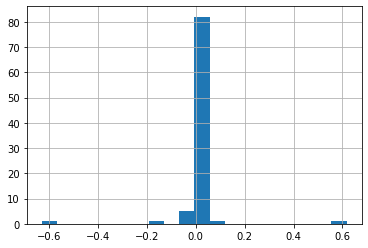

In [ ]:
data["% error vs MP"].replace([np.inf, -np.inf], np.nan).dropna().hist(bins=20)